<a href="https://colab.research.google.com/github/RicardoVictor/portfolio/blob/master/mineracao_tb01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipe

CRISTIAN LINO MARTINS DE SOUZA - 384346

RICARDO VICTOR SILVA DE OLIVEIRA - 391793

# Dataset
Analyze sales data from more than 16,500 games 🎮

![](https://i.pinimg.com/originals/a1/86/c6/a186c6dfe00b207433a45a2c4d47a84e.gif)

**Descrição**

Este dataset contém uma lista de jogos com vendas superiores a 100.000 cópias.

Os campos incluem:

- Rank - Classificação das vendas globais
- Name - O nome dos jogos
- Platform - plataforma do lançamento dos jogos (por exemplo, PC, PS4 etc.)
- Year - Ano do lançamento do jogo
- Genre - Gênero do jogo
- Publisher - Editora/empresa do jogo
- NA_Sales - Vendas na América do Norte (em milhões)
- EU_Sales - Vendas na Europa (em milhões)
- JP_Sales - Vendas no Japão (em milhões)
- Other_Sales - Vendas em outras partes do mundo (em milhões)
- Global_Sales - Total de vendas mundiais. (em milhões)

**Objetivo**

Fazer uma rápida análise técnica para identificar alguns problemas do dataset, como valores nulos ou duplicatas. Também será realizado uma análise descritiva com um foco maior sobre as vendas para explorar tendências nos dados e tirar insights que poderam levar a um melhor entendimento do dataset, através de histogramas, análise de frequências, etc. Álem disso uma das empresas presente no dataframe (Nintendo) será usada como exemplo para uma análise mais detalhada.

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from io import BytesIO
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Configurações de fonte

In [ ]:

font = {'size'   : 14}
plt.rc('font', **font)

'''
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
'''

"\nplt.rcParams['text.color'] = 'black'\nplt.rcParams['axes.labelcolor'] = 'white'\nplt.rcParams['xtick.color'] = 'white'\nplt.rcParams['ytick.color'] = 'white'\n"

In [ ]:
url = 'https://drive.google.com/file/d/1eSD-u6mYKCtJjQIz4ppFbgB7IH7R1l6p/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)

## Informações técnicas do dataset

In [ ]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Quantidade de jogos no dataset

In [ ]:
len(df['Name'].unique())

11493

## Gráfico de pares - Distribuição dos dados

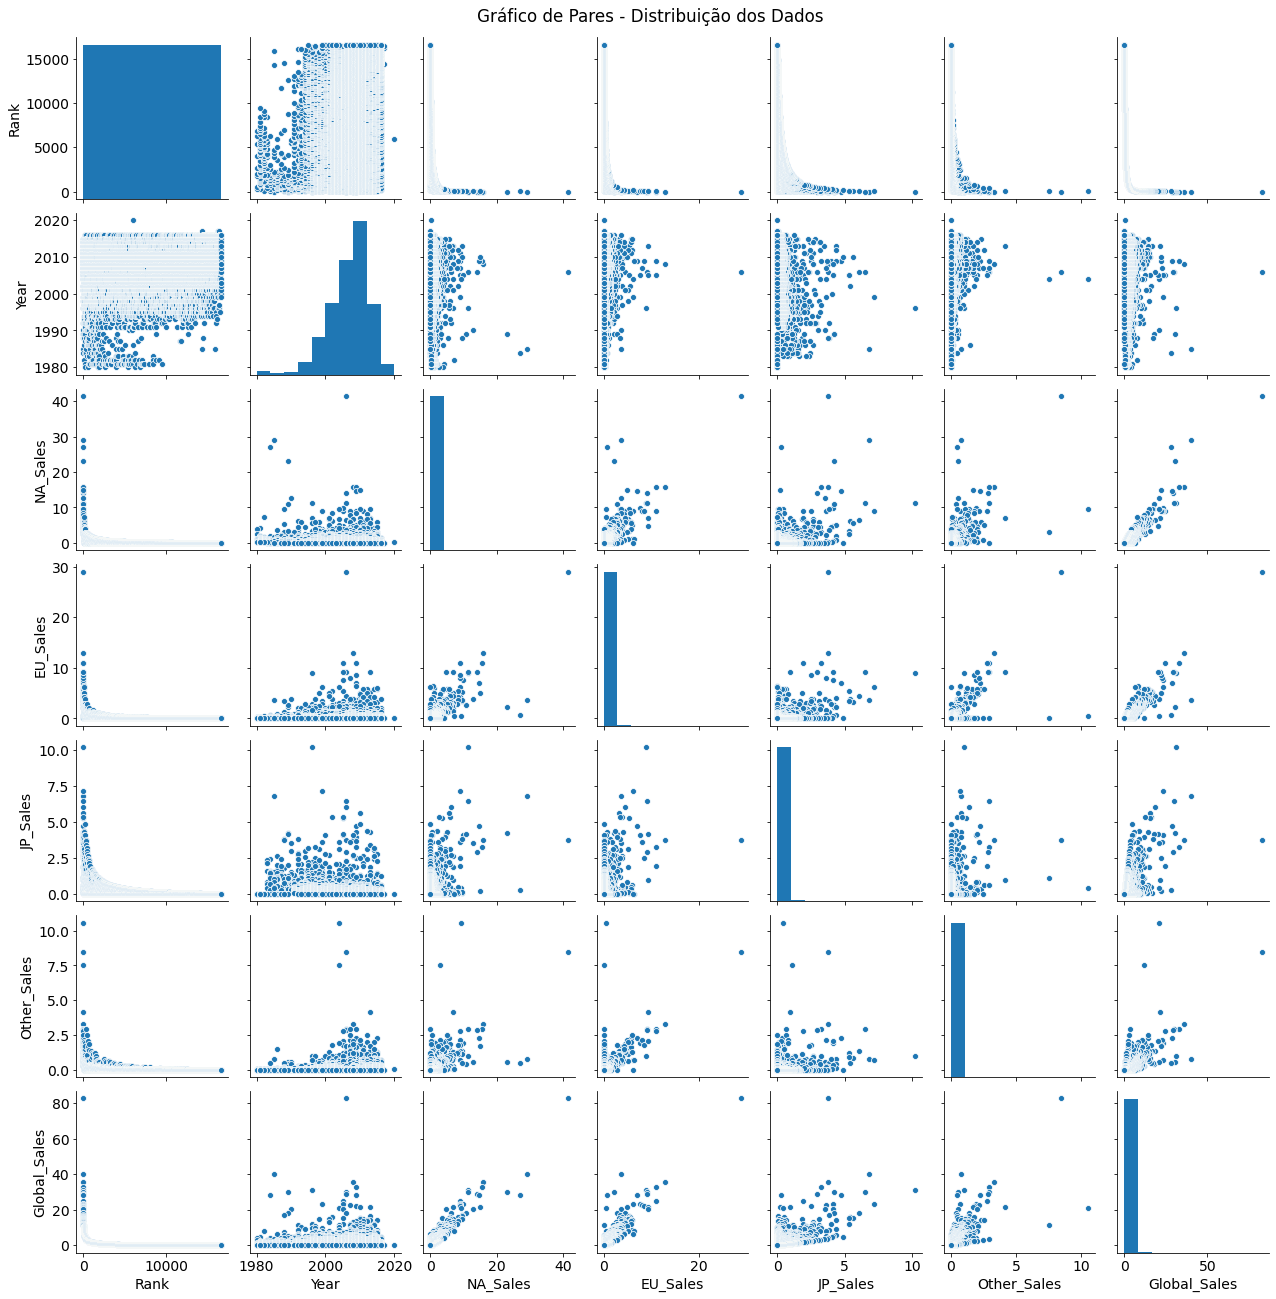

In [ ]:
ax = sns.pairplot(df)
ax.fig.suptitle('Gráfico de Pares - Distribuição dos Dados', y=1.02)
plt.show()

## Ordenação dos registros pela coluna Rank 

In [ ]:
df.sort_values('Rank')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Distribuição de vendas para cada genêro dividida por região

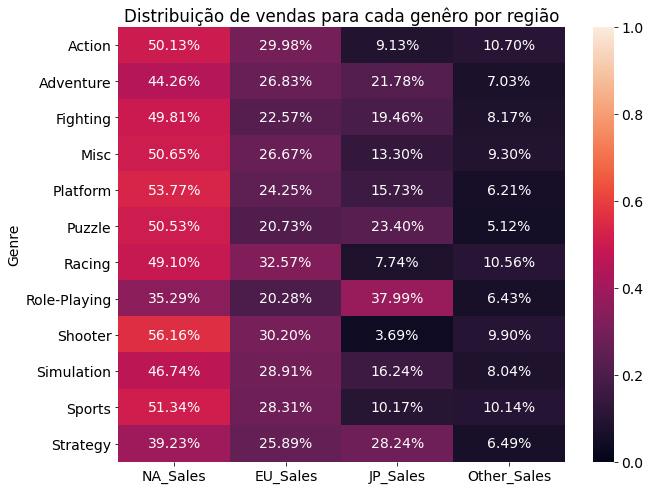

In [ ]:
subset = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
subset['NA_Sales'] = subset['NA_Sales']/subset['Global_Sales']
subset['EU_Sales'] = subset['EU_Sales']/subset['Global_Sales']
subset['JP_Sales'] = subset['JP_Sales']/subset['Global_Sales']
subset['Other_Sales'] = subset['Other_Sales']/subset['Global_Sales']
plt.figure(figsize=(10, 8))
sns.heatmap(subset.loc[:,'NA_Sales':'Other_Sales'], vmax=1, vmin=0, annot=True, fmt = '.2%')
plt.title("Distribuição de vendas para cada genêro por região")
plt.show()

## Valores Faltantes ou duplicados

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Registros com dados NaN

In [ ]:
df.loc[pd.isnull(df).any(1), :]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


## Mais de um jogo por ano ou plataforma

Analisando o dataset por contagem de nome descobriu-se que existem mais de um registro para um jogo específico:

In [ ]:
df['Name'].value_counts()

Need for Speed: Most Wanted              12
FIFA 14                                   9
LEGO Marvel Super Heroes                  9
Madden NFL 07                             9
Ratatouille                               9
                                         ..
The Dukes of Hazzard: Racing for Home     1
Darkspore                                 1
MediEvil: Resurrection                    1
Guild Wars 2                              1
Sekirei: Mirai Kara no Okurimono          1
Name: Name, Length: 11493, dtype: int64

Por exemplo o jogo 'Need for Speed: Most Wanted', que contém 12 registros com seu nome variando na plataforma e ano de publicação.

In [ ]:
df[df['Name'] == 'Need for Speed: Most Wanted'].sort_values('Rank')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


## Valores Unknown

Observa-se que apesar de não serem nulos existem registros preenchidos com valor 'Unknown' para Publisher.

In [ ]:
df[(df['Publisher'] == 'Unknown')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2114,2116,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2236,2238,Teenage Mutant Ninja Turtles,GBA,2003.0,Action,Unknown,0.67,0.25,0.00,0.02,0.93
...,...,...,...,...,...,...,...,...,...,...,...
16460,16463,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015.0,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16532,16535,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01
16545,16548,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011.0,Puzzle,Unknown,0.01,0.00,0.00,0.00,0.01


Valores unicos para Publisher

In [ ]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


## Publishers mais frequentes no dataset

In [ ]:
top_publishers = df['Publisher'].value_counts()[0:10]
top_publishers

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

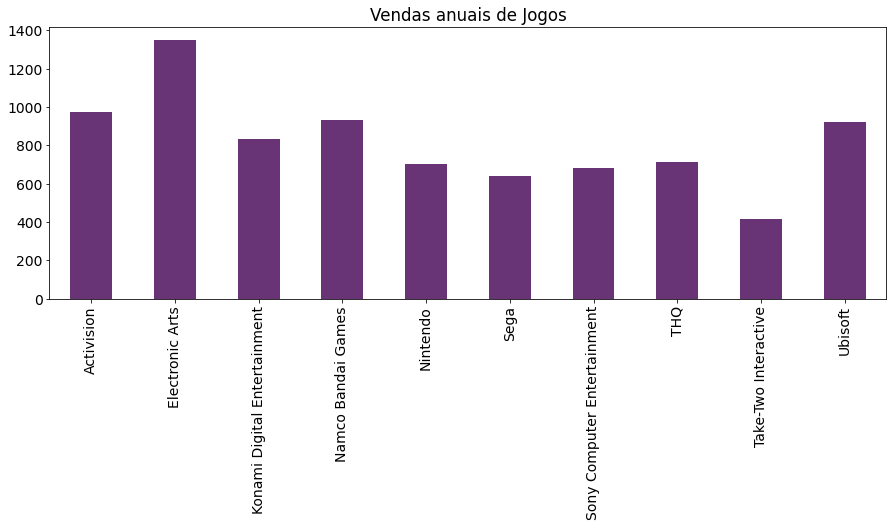

In [ ]:
top_publishers.sort_index().plot(kind='bar', figsize=(15, 5), title='Vendas anuais de Jogos', linewidth=2, colormap='viridis' ,alpha=0.8)

## Quantidade de games que Publishers possuem no top 100 Games

In [ ]:
top100 = df.iloc[:100]

trace = go.Histogram(x=top100.Publisher,marker=dict(color="crimson",line=dict(color='red', width=2)),opacity=0.75)
layout = go.Layout(
    title='Quantidade de games que Publishers possuem no top 100 Games',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Quantidade'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Histograma

Distribuição dos dados da coluna Year

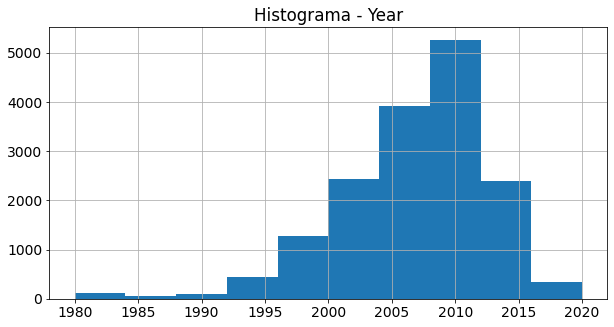

In [ ]:
df['Year'].hist(figsize=(10, 5))
plt.title('Histograma - Year')
plt.show()

## Gráfico da quantidade de vendas globais por ano:

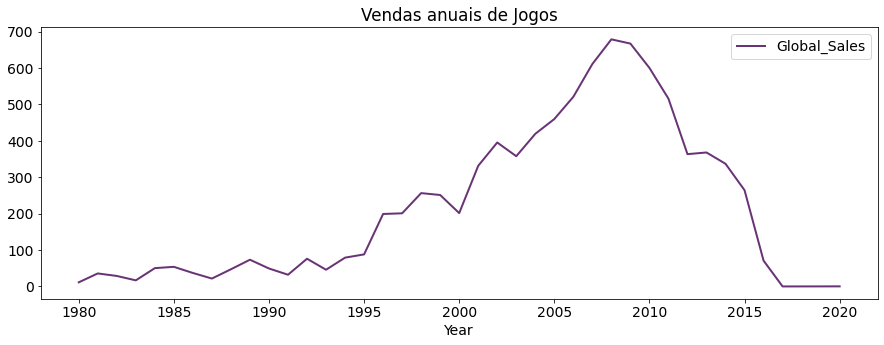

In [ ]:
df[['Year', 'Global_Sales']].groupby(['Year']).sum().plot(kind="line", figsize=(15, 5), title='Vendas anuais de Jogos', linewidth=2, colormap='viridis' ,alpha=0.8)
plt.show()

O gráfico acima aparenta que as vendas vem decaindo desde 2010, porém ao visualizarmos o histograma da coluna Year vemos que esse declíneo ocorre por termos menos dados no dataset referentes a esses anos.

## Gráficos da quantidade de vendas ao longo dos anos das 5 plataformas que mais venderam globalmente

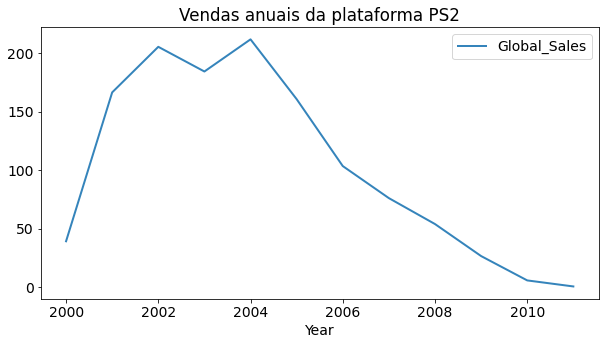

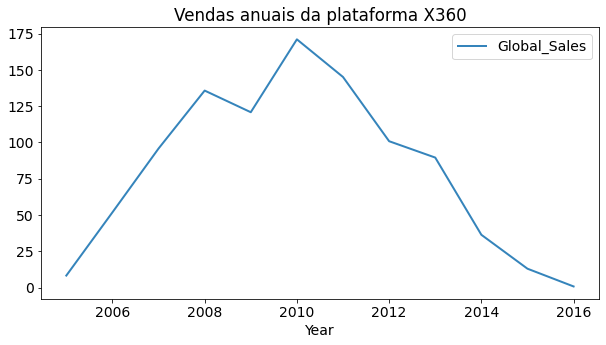

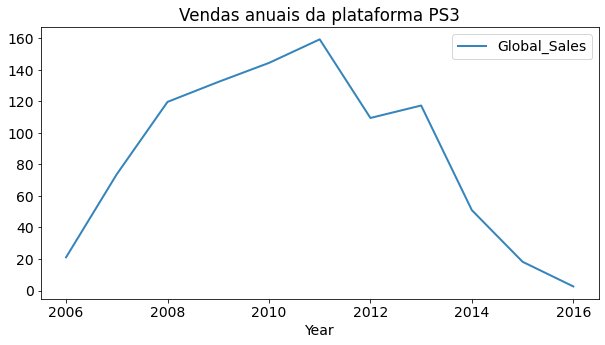

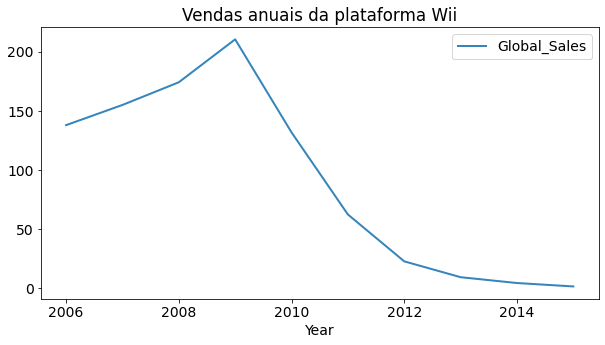

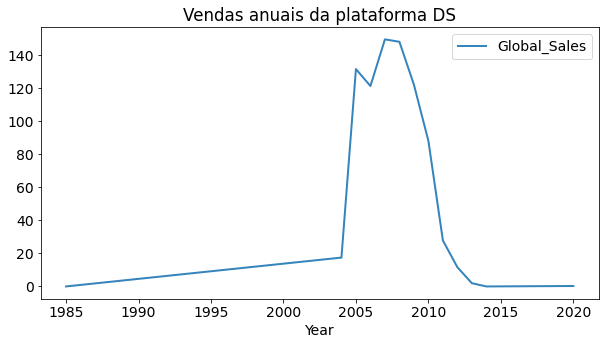

In [ ]:
top5_platforms = df.groupby('Platform').sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(5).index

for plataforma in top5_platforms:
    df[df['Platform']==plataforma][['Year', 'Global_Sales']].groupby(['Year']).sum().plot(kind="line", figsize=(10, 5), title=f'Vendas anuais da plataforma {plataforma}', linewidth=2, alpha=0.9)
    plt.show()
    

## Análise das palavras dos títulos dos jogos mais vendidos

Para os 1000 jogos mais vendidos

In [ ]:
df_top = df.groupby('Name').sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(1000)
df_top

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
...,...
Guitar Hero Live,2.02
MX vs. ATV Reflex,2.02
Forza Horizon,2.02


In [ ]:
names = df_top.index
all_names = ' '.join(name for name in names)
print('Quantidade total de palavras:', len(all_names))

Quantidade total de palavras: 21611


### WordCloud 

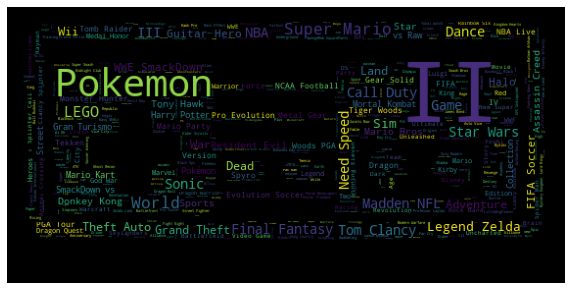

In [ ]:
url_image = 'https://i.etsystatic.com/10363684/r/il/134808/831219792/il_570xN.831219792_fxiw.jpg'
response = requests.get(url_image)
mask = np.array(Image.open(BytesIO(response.content)))

stopwords = set(STOPWORDS)
stopwords.update(['da', 'de', 'em', 'ao', 'os'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=2000, height=2000, max_words=500,
                      mask=mask, max_font_size=200,
                      min_font_size=1).generate(all_names)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
plt.show()

É importante notar que a imagem acima é um controle de nintendinho.

# Análises

## Os mais vendidos

### Top 10 mais vendidos global

Empresa (Publisher)

In [ ]:
df.groupby('Publisher').sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


Genero

In [ ]:
df.groupby('Genre').sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


Plataforma

In [ ]:
df.groupby('Platform').sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


Jogo

In [ ]:
df.groupby('Name').sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


### Top 10 mais vendidos NA

Empresa (Publisher)

In [ ]:
df.groupby('Publisher').sum()[['NA_Sales']].sort_values('NA_Sales', ascending=False).head(10)

,NA_Sales
Publisher,
Nintendo,816.87
Electronic Arts,595.07
Activision,429.70
Sony Computer Entertainment,265.22
Ubisoft,253.43
Take-Two Interactive,220.49
THQ,208.77
Microsoft Game Studios,155.35
Atari,110.04


Genero

In [ ]:
df.groupby('Genre').sum()[['NA_Sales']].sort_values('NA_Sales', ascending=False).head(10)

,NA_Sales
Genre,
Action,877.83
Sports,683.35
Shooter,582.60
Platform,447.05
Misc,410.24
Racing,359.42
Role-Playing,327.28
Fighting,223.59
Simulation,183.31


Plataforma

In [ ]:
df.groupby('Platform').sum()[['NA_Sales']].sort_values('NA_Sales', ascending=False).head(10)

,NA_Sales
Platform,
X360,601.05
PS2,583.84
Wii,507.71
PS3,392.26
DS,390.71
PS,336.51
GBA,187.54
XB,186.69
N64,139.02


Jogo

In [ ]:
df.groupby('Name').sum()[['NA_Sales']].sort_values('NA_Sales', ascending=False).head(10)

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
Call of Duty: Black Ops,17.59
Super Mario World,15.99
Mario Kart Wii,15.85
Wii Sports Resort,15.75


### Top 10 mais vendidos EU

Empresa (Publisher)

In [ ]:
df.groupby('Publisher').sum()[['EU_Sales']].sort_values('EU_Sales', ascending=False).head(10)

,EU_Sales
Publisher,
Nintendo,418.74
Electronic Arts,371.27
Activision,215.53
Sony Computer Entertainment,187.72
Ubisoft,163.32
Take-Two Interactive,118.14
THQ,94.73
Sega,82.00
Konami Digital Entertainment,69.69


Genero

In [ ]:
df.groupby('Genre').sum()[['EU_Sales']].sort_values('EU_Sales', ascending=False).head(10)

,EU_Sales
Genre,
Action,525.00
Sports,376.85
Shooter,313.27
Racing,238.39
Misc,215.98
Platform,201.63
Role-Playing,188.06
Simulation,113.38
Fighting,101.32


Plataforma

In [ ]:
df.groupby('Platform').sum()[['EU_Sales']].sort_values('EU_Sales', ascending=False).head(10)

,EU_Sales
Platform,
PS3,343.71
PS2,339.29
X360,280.58
Wii,268.38
PS,213.60
DS,194.65
PC,139.68
PS4,123.70
GBA,75.25


Jogo

In [ ]:
df.groupby('Name').sum()[['EU_Sales']].sort_values('EU_Sales', ascending=False).head(10)

,EU_Sales
Name,
Wii Sports,29.02
Grand Theft Auto V,23.04
Mario Kart Wii,12.88
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29
FIFA 16,11.29
FIFA 14,11.14
Call of Duty: Black Ops II,11.05
Wii Sports Resort,11.01


### Top 10 mais vendidos JP

Empresa (Publisher)

In [ ]:
df.groupby('Publisher').sum()[['JP_Sales']].sort_values('JP_Sales', ascending=False).head(10)

,JP_Sales
Publisher,
Nintendo,455.42
Namco Bandai Games,127.07
Konami Digital Entertainment,91.30
Sony Computer Entertainment,74.10
Capcom,68.08
Sega,57.03
Square Enix,49.88
SquareSoft,40.13
Enix Corporation,32.40


Genero

In [ ]:
df.groupby('Genre').sum()[['JP_Sales']].sort_values('JP_Sales', ascending=False).head(10)

,JP_Sales
Genre,
Role-Playing,352.31
Action,159.95
Sports,135.37
Platform,130.77
Misc,107.76
Fighting,87.35
Simulation,63.70
Puzzle,57.31
Racing,56.69


Plataforma

In [ ]:
df.groupby('Platform').sum()[['JP_Sales']].sort_values('JP_Sales', ascending=False).head(10)

,JP_Sales
Platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
NES,98.65
3DS,97.35
GB,85.12
PS3,79.99
PSP,76.79


Jogo

In [ ]:
df.groupby('Name').sum()[['JP_Sales']].sort_values('JP_Sales', ascending=False).head(10)

,JP_Sales
Name,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.96
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04
Tetris,6.03
Pokemon Black/Pokemon White,5.65
Dragon Quest VII: Warriors of Eden,5.40
Pokemon Ruby/Pokemon Sapphire,5.38


### Top 10 mais vendidos outros

Empresa (Publisher)

In [ ]:
df.groupby('Publisher').sum()[['Other_Sales']].sort_values('Other_Sales', ascending=False).head(10)

,Other_Sales
Publisher,
Electronic Arts,129.77
Nintendo,95.33
Sony Computer Entertainment,80.45
Activision,75.34
Take-Two Interactive,55.24
Ubisoft,50.26
THQ,32.14
Konami Digital Entertainment,30.31
Sega,24.52


Genero

In [ ]:
df.groupby('Genre').sum()[['Other_Sales']].sort_values('Other_Sales', ascending=False).head(10)

,Other_Sales
Genre,
Action,187.38
Sports,134.97
Shooter,102.69
Racing,77.27
Misc,75.32
Role-Playing,59.61
Platform,51.59
Fighting,36.68
Simulation,31.52


Plataforma

In [ ]:
df.groupby('Platform').sum()[['Other_Sales']].sort_values('Other_Sales', ascending=False).head(10)

,Other_Sales
Platform,
PS2,193.44
PS3,141.93
X360,85.54
Wii,80.61
DS,60.53
PS4,43.36
PSP,42.19
PS,40.91
PC,24.86


Jogo

In [ ]:
df.groupby('Name').sum()[['Other_Sales']].sort_values('Other_Sales', ascending=False).head(10)

,Other_Sales
Name,
Grand Theft Auto: San Andreas,10.72
Wii Sports,8.46
Grand Theft Auto V,8.03
Gran Turismo 4,7.53
Call of Duty: Black Ops II,3.88
FIFA Soccer 08,3.53
Pro Evolution Soccer 2008,3.51
Call of Duty: Black Ops 3,3.42
Call of Duty: Black Ops,3.36


### Mais vendidos agrupados por plataforma, genero e empresa

In [ ]:
df.groupby(['Platform', 'Genre', 'Publisher']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

,,,Global_Sales
Platform,Genre,Publisher,
Wii,Sports,Nintendo,169.19
PS2,Sports,Electronic Arts,135.11
X360,Shooter,Activision,102.29
PS3,Shooter,Activision,87.72
DS,Role-Playing,Nintendo,85.88
NES,Platform,Nintendo,81.25
PS3,Sports,Electronic Arts,77.56
GB,Role-Playing,Nintendo,76.06
X360,Sports,Electronic Arts,75.98


## Análise Nintendo

![](https://thumbs.imagekind.com/3852459_650/Nintendo-Controller-Evolution-Black--White_art.jpg?v=1492504834)

In [ ]:
df_nintendo = df[df['Publisher']=='Nintendo']
df_nintendo.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Gráfico de vendas da empresa ao longo dos anos

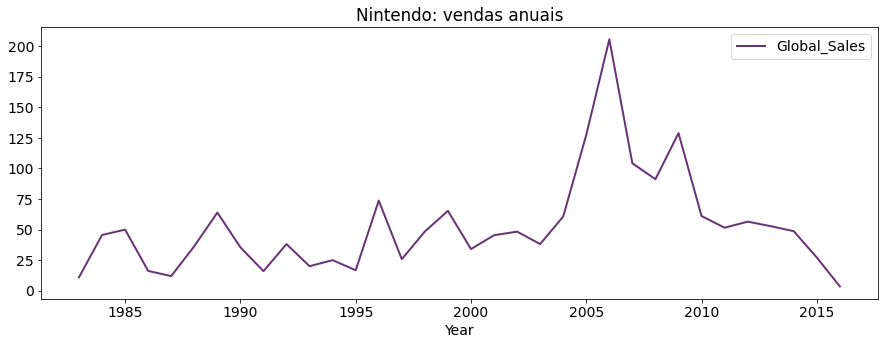

In [ ]:
df_nintendo[['Year', 'Global_Sales']].groupby(['Year']).sum().plot(kind="line", figsize=(15, 5), title='Nintendo: vendas anuais', linewidth=2, colormap='viridis' ,alpha=0.8)
plt.show()

### Jogos mais vendidos da empresa 

In [ ]:
df_nintendo.groupby(['Name']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(5)

,Global_Sales
Name,
Wii Sports,82.74
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00


### Gêneros mais vendidos da empresa

In [ ]:
df_nintendo.groupby(['Genre']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(5)

,Global_Sales
Genre,
Platform,427.21
Role-Playing,284.90
Sports,218.01
Misc,180.67
Racing,151.30


### Plataformas que mais venderam

In [ ]:
df_nintendo.groupby(['Platform']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(5)

,Global_Sales
Platform,
Wii,390.46
DS,349.75
GB,230.09
NES,183.97
3DS,156.45


### Jogos mais vendidos do genero X

#### Genero: Platform

In [ ]:
#genero: Platform
df_nintendo[df['Genre'] == 'Platform'].groupby(['Name']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Global_Sales
Name,
Super Mario Bros.,45.31
New Super Mario Bros.,30.01
New Super Mario Bros. Wii,28.62
Super Mario World,26.07
Super Mario Bros. 3,22.48
Super Mario 64,22.31
Super Mario Land,18.14
Donkey Kong Country,13.53
Super Mario Galaxy,11.52


#### Genero: role-playing

In [ ]:
#genero: Role-Playing
df_nintendo[df['Genre'] == 'Role-Playing'].groupby(['Name']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Global_Sales
Name,
Pokemon Red/Pokemon Blue,31.37
Pokemon Gold/Pokemon Silver,23.10
Pokemon Diamond/Pokemon Pearl,18.36
Pokemon Ruby/Pokemon Sapphire,15.85
Pokemon Black/Pokemon White,15.32
Pokémon Yellow: Special Pikachu Edition,14.64
Pokemon X/Pokemon Y,14.35
Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.33
Pokemon FireRed/Pokemon LeafGreen,10.49


#### Genero: Sports

In [ ]:
#genero: Sports
df_nintendo[df['Genre'] == 'Sports'].groupby(['Name']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Global_Sales
Name,
Wii Sports,82.74
Wii Sports Resort,33.00
Wii Fit,22.72
Wii Fit Plus,22.00
Golf,6.13
Baseball,4.81
Tennis,4.16
Mario Tennis,3.57
Mario Strikers Charged,2.62


### Jogos mais vendidos para cada plataforma

In [ ]:
for platform in df_nintendo['Platform'].unique():
    print('\n'+f'Plataforma: {platform}')
    print(df_nintendo[df['Platform'] == platform].groupby(['Name']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(5))


Plataforma: Wii
                           Global_Sales
Name                                   
Wii Sports                        82.74
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Wii Play                          29.02
New Super Mario Bros. Wii         28.62

Plataforma: NES
                     Global_Sales
Name                             
Super Mario Bros.           40.24
Duck Hunt                   28.31
Super Mario Bros. 3         17.28
Super Mario Bros. 2          7.46
The Legend of Zelda          6.51

Plataforma: GB
                                         Global_Sales
Name                                                 
Pokemon Red/Pokemon Blue                        31.37
Tetris                                          30.26
Pokemon Gold/Pokemon Silver                     23.10
Super Mario Land                                18.14
Pokémon Yellow: Special Pikachu Edition         14.64

Plataforma: DS
                                      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/l

### Jogos mais vendidos para cada gênero

In [ ]:
for genre in df_nintendo['Genre'].unique():
    print('\n'+f'Gênero: {genre}')
    print(df_nintendo[df['Genre'] == genre].groupby(['Name']).sum()[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.




Gênero: Sports
                   Global_Sales
Name                           
Wii Sports                82.74
Wii Sports Resort         33.00
Wii Fit                   22.72
Wii Fit Plus              22.00
Golf                       6.13

Gênero: Platform
                           Global_Sales
Name                                   
Super Mario Bros.                 45.31
New Super Mario Bros.             30.01
New Super Mario Bros. Wii         28.62
Super Mario World                 26.07
Super Mario Bros. 3               22.48

Gênero: Racing
                  Global_Sales
Name                          
Mario Kart Wii           35.82
Mario Kart DS            23.42
Mario Kart 7             12.21
Mario Kart 64             9.87
Super Mario Kart          8.76

Gênero: Role-Playing
                               Global_Sales
Name                                       
Pokemon Red/Pokemon Blue              31.37
Pokemon Gold/Pokemon Silver           23.10
Pokemon Diamond/Pokemon Pearl  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



                                              Global_Sales
Name                                                      
Wii Play                                             29.02
Brain Age: Train Your Brain in Minutes a Day         20.22
Mario Party DS                                        9.02
Wii Party                                             8.49
Mario Party 8                                         8.42

Gênero: Shooter
                          Global_Sales
Name                                  
Duck Hunt                        28.31
GoldenEye 007                     8.09
Link's Crossbow Training          5.00
Splatoon                          4.57
Star Fox 64                       4.03

Gênero: Simulation
                             Global_Sales
Name                                     
Nintendogs                          24.76
Animal Crossing: Wild World         12.27
Animal Crossing: New Leaf            9.09
Tomodachi Life                       5.15
Animal Crossing: City Fol

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

